In [21]:
from cmath import log
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

conn = psycopg2.connect(
host="localhost",
database="Database Management Project",
user="postgres",
password="MoZeMJeBaT66")


cur = conn.cursor()

def create_pandas_table(sql_query, database = conn):
    table = pd.read_sql_query(sql_query, database)
    return table




d:\Anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


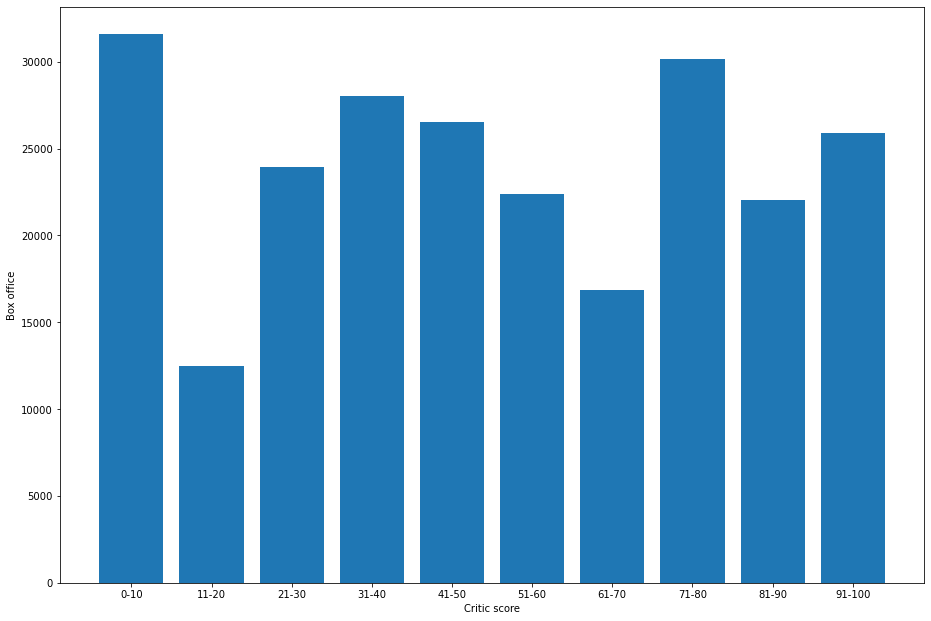

In [22]:
#H1 Higher online critic ratings correlate positively with the worldwide box office sales of movies.  

Avg_boxoffice_metascore = create_pandas_table(
    """WITH binned_avg_temp AS (
SELECT movie_data.meta_score, movie_data.worldwide_box_office,
CASE 
	WHEN movie_data.meta_score >= 0 AND movie_data.meta_score <= 10 THEN '0-10'
	WHEN movie_data.meta_score > 10 AND movie_data.meta_score <= 20 THEN '11-20'
	WHEN movie_data.meta_score > 20 AND movie_data.meta_score <= 30 THEN '21-30'
	WHEN movie_data.meta_score > 30 AND movie_data.meta_score <= 40 THEN '31-40'
	WHEN movie_data.meta_score > 40 AND movie_data.meta_score <= 50 THEN '41-50'
	WHEN movie_data.meta_score > 50 AND movie_data.meta_score <= 60 THEN '51-60'
	WHEN movie_data.meta_score > 60 AND movie_data.meta_score <= 70 THEN '61-70'
	WHEN movie_data.meta_score > 70 AND movie_data.meta_score <= 80 THEN '71-80'
	WHEN movie_data.meta_score > 80 AND movie_data.meta_score <= 90 THEN '81-90'
	ELSE '91-100' END AS metascore_category
FROM movie_data)

SELECT (metascore_category), AVG(worldwide_box_office)/1000
FROM binned_avg_temp
GROUP BY metascore_category
;
""")
Avg_boxoffice_metascore

Avg_boxoffice_metascore=Avg_boxoffice_metascore.sort_values("metascore_category")

Avg_boxoffice_metascore.columns=["metascore_category","avg_box_office"]

fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
ax.bar(Avg_boxoffice_metascore["metascore_category"],Avg_boxoffice_metascore["avg_box_office"])
ax.set_xlabel('Critic score')
ax.set_ylabel('Box office')


plt.show()


d:\Anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


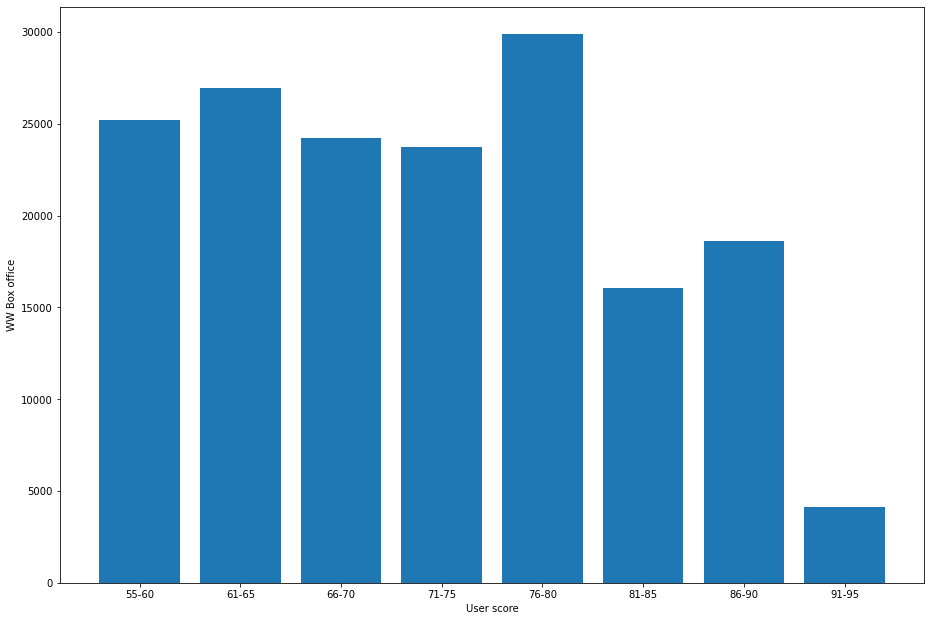

In [23]:
#H2 A positive valence of the consumer reviews will have a positive influence on the worldwide box office sales of movies.

Avg_boxoffice_pos_consumer_reviews = create_pandas_table("""WITH binned_avg_temp AS (
SELECT movie_data.user_score, movie_data.worldwide_box_office,
CASE 
	WHEN movie_data.user_score >= 55 AND movie_data.user_score <= 60 THEN '55-60'
	WHEN movie_data.user_score > 60 AND movie_data.user_score <= 65 THEN '61-65'
	WHEN movie_data.user_score > 65 AND movie_data.user_score <= 70 THEN '66-70'
	WHEN movie_data.user_score > 70 AND movie_data.user_score <= 75 THEN '71-75'
	WHEN movie_data.user_score > 75 AND movie_data.user_score <= 80 THEN '76-80'
	WHEN movie_data.user_score > 80 AND movie_data.user_score <= 85 THEN '81-85'
	WHEN movie_data.user_score > 85 AND movie_data.user_score <= 90 THEN '86-90'
	WHEN movie_data.user_score > 90 AND movie_data.user_score <= 95 THEN '91-95'
	ELSE '96-100' END AS userscore_category
FROM movie_data)

SELECT (userscore_category), AVG(worldwide_box_office)/1000
FROM binned_avg_temp
WHERE user_score >55
GROUP BY userscore_category
;""")

Avg_boxoffice_pos_consumer_reviews=Avg_boxoffice_pos_consumer_reviews.sort_values("userscore_category")

Avg_boxoffice_pos_consumer_reviews.columns=["userscore_category","avg_box_office"]



fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
ax.bar(Avg_boxoffice_pos_consumer_reviews["userscore_category"],Avg_boxoffice_pos_consumer_reviews["avg_box_office"])
ax.set_xlabel('User score')
ax.set_ylabel('WW Box office')

plt.show()



d:\Anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

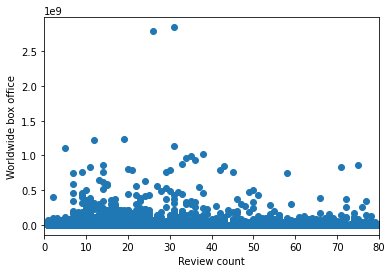

In [24]:
#H3 Volume of user ratings has a positive impact on the worldwide box office sales of movies 

Review_count_to_ww_boxoffice = create_pandas_table(
"""DROP TABLE IF EXISTS Volume_review_box_office;



CREATE TABLE Volume_review_box_office AS (



SELECT Reviews.movie_ID, Reviews.idv_score,
    movie_data.worldwide_box_office
FROM Reviews
LEFT JOIN movie_data
ON reviews.movie_id = movie_data.movie_id
);



SELECT movie_id, worldwide_box_office, COUNT(movie_id) AS review_count
from volume_review_box_office
group by movie_id, worldwide_box_office
order by movie_id, worldwide_box_office;""")


Review_count_to_ww_boxoffice = Review_count_to_ww_boxoffice.sort_values("review_count",ascending=False)

Review_count_to_ww_boxoffice

x = Review_count_to_ww_boxoffice['review_count']
y = Review_count_to_ww_boxoffice['worldwide_box_office']
plt.scatter(x,y)
plt.ylabel ('Worldwide box office')
plt.xlabel ('Review count')
plt.xlim (0,80)
plt.show

# fig=plt.figure()
# ax=fig.add_axes([0,0,2,2])
# ax.bar(Review_count_to_ww_boxoffice["review_count"],Review_count_to_ww_boxoffice["worldwide_box_office"])
# ax.set_xlabel('No. of Reviews')
# ax.set_ylabel('WW Box office')
# ax.set_xlim(0,300)

# plt.show



In [25]:
#N4 Movie genres have a significant influence on the height of critic ratings.

Avg_metascore_genre = create_pandas_table(

"""SELECT genre_type, AVG(meta_score) AS Average_Metascore
from movie_data where genre_type != 'Reality'
group by genre_type
order by genre_type
;""")

Avg_metascore_genre = Avg_metascore_genre.round(decimals = 1)
Avg_metascore_genre = Avg_metascore_genre.sort_values("average_metascore",ascending=False)

Avg_metascore_genre



d:\Anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,genre_type,average_metascore
7,Educational,64.7
10,Musical,58.6
1,Adventure,57.7
8,Horror,57.6
0,Action,57.2
3,Comedy,57.1
2,Black Comedy,57.0
6,Drama,57.0
5,Documentary,56.7
9,Multiple Genres,56.5


d:\Anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


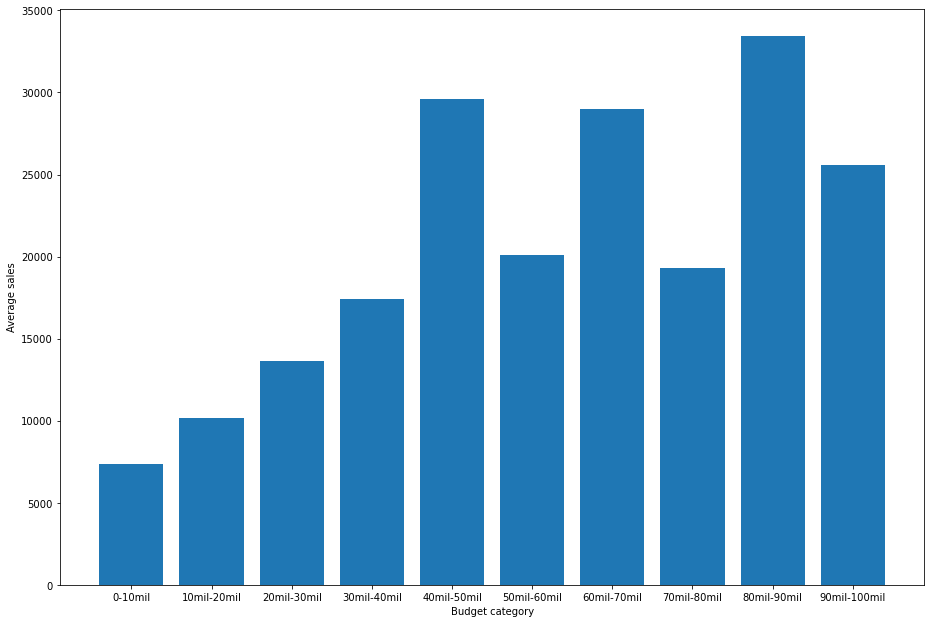

In [26]:
#N5 The production budget has a positive influence on the box office movies sales


Budget_to_ww_boxoffice = create_pandas_table (
    """WITH binned_avg_temp AS (
SELECT movie_data.budget, movie_data.worldwide_box_office,
CASE 
	WHEN movie_data.budget >= 0 AND movie_data.budget <= 1000000 THEN '0-10mil'
	WHEN movie_data.budget >= 1000000 AND movie_data.budget <= 2000000 THEN '10mil-20mil'
	WHEN movie_data.budget >= 2000000 AND movie_data.budget <= 3000000 THEN '20mil-30mil'
	WHEN movie_data.budget >= 3000000 AND movie_data.budget <= 4000000 THEN '30mil-40mil'
	WHEN movie_data.budget >= 4000000 AND movie_data.budget <= 5000000 THEN '40mil-50mil'
	WHEN movie_data.budget >= 5000000 AND movie_data.budget <= 6000000 THEN '50mil-60mil'
	WHEN movie_data.budget >= 6000000 AND movie_data.budget <= 7000000 THEN '60mil-70mil'
	WHEN movie_data.budget >= 7000000 AND movie_data.budget <= 8000000 THEN '70mil-80mil'
	WHEN movie_data.budget >= 8000000 AND movie_data.budget <= 9000000 THEN '80mil-90mil'
	ELSE '90mil-100mil' END AS budgetcategory
FROM movie_data)
SELECT (budgetcategory), AVG(worldwide_box_office)/1000
FROM binned_avg_temp
GROUP BY budgetcategory
;

;""")



Budget_to_ww_boxoffice.columns=["budgetcategory", "average_sales"]

Budget_to_ww_boxoffice = Budget_to_ww_boxoffice.sort_values("budgetcategory")

fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
ax.bar(Budget_to_ww_boxoffice["budgetcategory"],Budget_to_ww_boxoffice["average_sales"])
ax.set_xlabel('Budget category')
ax.set_ylabel('Average sales')


plt.show()

cur.close()
conn.close()